In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np
import warnings
warnings.filterwarnings('ignore')

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reads the .csv file into variable df
df = pd.read_excel('G:/Semester 5/Teknik Presentasi Data/data_iklim.xlsx')
data = df.drop(['bulan', 'tahun'], axis=1)
# Standardizes df
data = pd.DataFrame(
    StandardScaler().fit_transform(data),
    columns=data.columns)
data

,Rata-Rata Suhu (Derajat Celsius),Kelembapan (%),Tekanan Udara (mb),Kecepatan Angin (knot),Lama Penyinaran Matahari (%)
0,-0.106782,1.546167,-0.290402,0.329252,-0.880208
1,0.223734,0.937685,0.818815,-1.081829,-0.101616
2,-0.305092,1.241926,0.001497,0.329252,-1.191645
3,-0.106782,0.633445,0.118257,0.329252,-1.035927
4,-0.437298,0.024963,1.052334,0.329252,0.754835
5,-1.428846,0.329204,1.227473,0.329252,0.754835
6,-3.742459,-0.279277,2.044791,0.329252,-0.101616
7,-1.759362,-0.583518,2.219931,1.740334,1.221990
8,-1.098330,-0.887759,2.570210,1.740334,1.144131
9,0.157631,-1.800481,1.227473,1.740334,1.611287


In [4]:
def Best_Clustering(data = data, max_clusters = 10, scaling = True, visualization = True):
    
    n_clusters_list=[]
    silhouette_list=[]
    
    if scaling:
    #Data Scaling
        scaler = MinMaxScaler()
        data_std = scaler.fit_transform(data)
    else:    
        data_std = data
        
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data_std) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data_std, labels, metric='euclidean'))
    
    # Best Parameters
    param1 = n_clusters_list[np.argmax(silhouette_list)]
    param2 = max(silhouette_list)
    best_params = param1,param2
    
    # Data labeling with the best model
    kmeans_best = KMeans(n_clusters= param1 , random_state=42).fit(data_std) 
    labels_best = kmeans_best.labels_
    labeled_data = np.concatenate((data,labels_best.reshape(-1,1)),axis=1)
        
    if visualization:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.plot(n_clusters_list,silhouette_list, linewidth=3,
                label = "Silhouette Score Against # of Clusters")
        ax.set_xlabel("Number of clusters")
        ax.set_ylabel("Silhouette score")
        ax.set_title('Silhouette score according to number of clusters')
        ax.grid(True)
        plt.plot(param1,param2, "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
        plt.legend(loc="best",fontsize = 'large')
        plt.show();
        print( " Best Clustering corresponds to the following point : \
        Number of clusters = %i & Silhouette_score = %.2f."%best_params) 
    else:
        return best_params, labeled_data

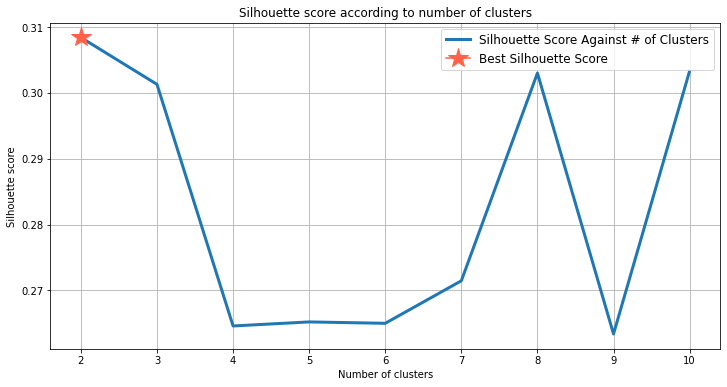

 Best Clustering corresponds to the following point :         Number of clusters = 2 & Silhouette_score = 0.31.


In [5]:
Best_Clustering(data = data, scaling = False)

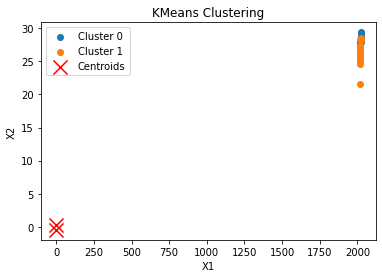

In [6]:
# Specify the number of clusters (adjust as needed)
num_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=1)

# Fit the model to the data
kmeans.fit(data)

# Add a new column to your DataFrame to store the cluster labels
df['Cluster'] = kmeans.labels_

'''

# Display the data points and their assigned clusters
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['bulan'], cluster_data['tahun'],cluster_data['Rata-Rata Suhu (Derajat Celsius)'], 
                cluster_data['Kelembapan (%)'], 
                cluster_data['Tekanan Udara (mb)'], cluster_data['Kecepatan Angin (knot)'],
                cluster_data['Lama Penyinaran Matahari (%)'],label=f'Cluster {cluster_id}')

# Plot the cluster centers if needed
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
'''

# Display the data points and their assigned clusters
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['tahun'],cluster_data['Rata-Rata Suhu (Derajat Celsius)'], 
                label=f'Cluster {cluster_id}')

# Plot the cluster centers if needed
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [7]:
df

,bulan,tahun,Rata-Rata Suhu (Derajat Celsius),Kelembapan (%),Tekanan Udara (mb),Kecepatan Angin (knot),Lama Penyinaran Matahari (%),Cluster
0,Januari,2019,27.1,86.0,1004.5,4.0,61.0,0
1,Pebruari,2019,27.6,84.0,1006.4,3.0,71.0,0
2,Maret,2019,26.8,85.0,1005.0,4.0,57.0,0
3,April,2019,27.1,83.0,1005.2,4.0,59.0,0
4,Mei,2019,26.6,81.0,1006.8,4.0,82.0,1
5,Juni,2019,25.1,82.0,1007.1,4.0,82.0,1
6,Juli,2019,21.6,80.0,1008.5,4.0,71.0,1
7,Agustus,2019,24.6,79.0,1008.8,5.0,88.0,1
8,September,2019,25.6,78.0,1009.4,5.0,87.0,1
9,Oktober,2019,27.5,75.0,1007.1,5.0,93.0,1


In [ ]:
df.to_excel(cluster iklim)